In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-rental-house-price/Indian_housing_Mumbai_data.csv
/kaggle/input/india-rental-house-price/Indian_housing_Pune_data.csv
/kaggle/input/india-rental-house-price/Indian_housing_Delhi_data.csv


# **Importing the dataset**

In [3]:
df=pd.read_csv("/kaggle/input/india-rental-house-price/Indian_housing_Delhi_data.csv")

In [4]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


# **Removing the unwanted columns**
there are columns like city where ever value is **Delhi** and currency where every value is **INR** these types of columns have no use in this analysis so it is better to remove them , it also improves readablity of the dataframe as it becomes smaller 

In [5]:
dc =["city","latitude","longitude","currency","isNegotiable","priceSqFt","verificationDate","description","SecurityDeposit"]
df.drop(columns=dc,inplace=True)


In [6]:
#first 5 rows 
df.head()

,house_type,house_size,location,price,numBathrooms,numBalconies,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished


# renaming the columns 


In [7]:
df.rename(columns={"house_type":"type","house_size":"size","numBathrooms":"bath","numBalconies":"balcony","Status":"status"},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      5000 non-null   object 
 1   size      5000 non-null   object 
 2   location  5000 non-null   object 
 3   price     5000 non-null   int64  
 4   bath      4975 non-null   float64
 5   balcony   2737 non-null   float64
 6   status    5000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 273.6+ KB


In [9]:
df.head()

,type,size,location,price,bath,balcony,status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished


In [10]:
#creating a new column to store the number of bedrooms that is derived from the type column
df["bhk"]=df["type"].str.extract(r'(\d+)').astype(int)

In [11]:
df.head()

,type,size,location,price,bath,balcony,status,bhk
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2


**The type column have so much data but it is all combined together i am creating new columns like Type and bhk to extract and store the data from the type column**

In [12]:
df["Type"]=df["type"].str.split().str[-1]

In [13]:
df.head()

,type,size,location,price,bath,balcony,status,bhk,Type
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3,House
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment


In [14]:
#since i have extracted all the data from type column i am droping it now 
df.drop(columns=["type"],inplace=True)

In [15]:
df.head()

,size,location,price,bath,balcony,status,bhk,Type
0,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment
1,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment
2,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor
3,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3,House
4,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment


In [16]:
#extracting the numerical value from the size column
df["Size"]=df["size"].str.extract(r'(\d+)').astype("float")

*droping the size column*

In [17]:
df.drop(columns=["size"],inplace=True)

In [18]:
df.head()

,location,price,bath,balcony,status,bhk,Type,Size
0,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment,400.0
1,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment,400.0
2,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor,500.0
3,Model Town,48000,3.0,NaN,Furnished,3,House,1.0
4,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment,810.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  5000 non-null   object 
 1   price     5000 non-null   int64  
 2   bath      4975 non-null   float64
 3   balcony   2737 non-null   float64
 4   status    5000 non-null   object 
 5   bhk       5000 non-null   int64  
 6   Type      5000 non-null   object 
 7   Size      5000 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 312.6+ KB


**i am filling the null values in bath room and balcony with there corresponding bhk value as this make sense and i think it will be better than to fill it with mean**

In [20]:
df["bath"]=df["bath"].fillna(df["bhk"])
df["balcony"]=df["balcony"].fillna(df["bhk"])

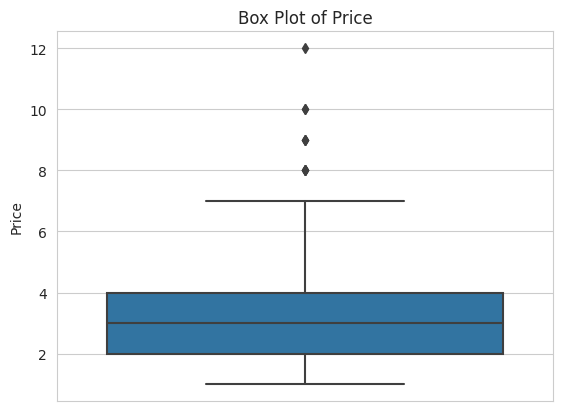

In [21]:
#box plot for bhk column 
sns.set_style("whitegrid")
sns.boxplot(data=df, y='bhk')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

***both the columns have outliers specially price***

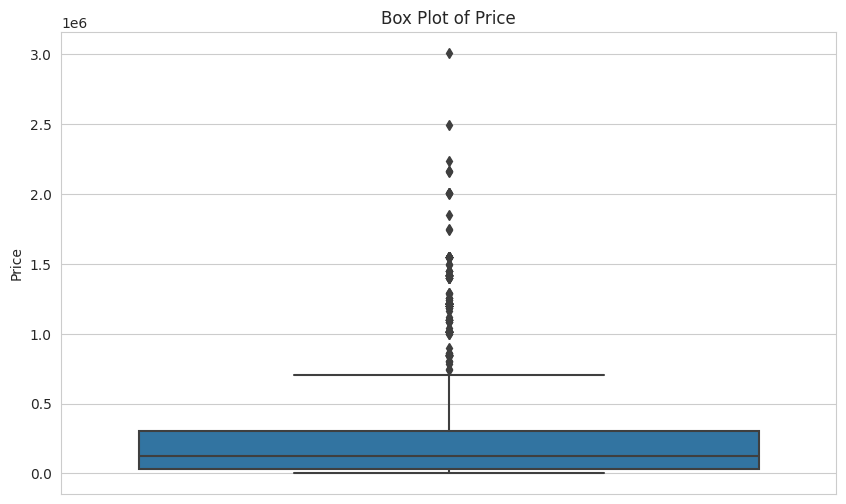

In [22]:
#box plot for price column
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

**I am removing the outliers in the price column first as it will remove most of the outliers from the bhk column also**

In [23]:
#remove the outliers
q1=df["price"].quantile(0.25)
q3=df["price"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers=(df["price"] < lower_bound ) | (df["price"] > upper_bound)
df=df[~outliers]

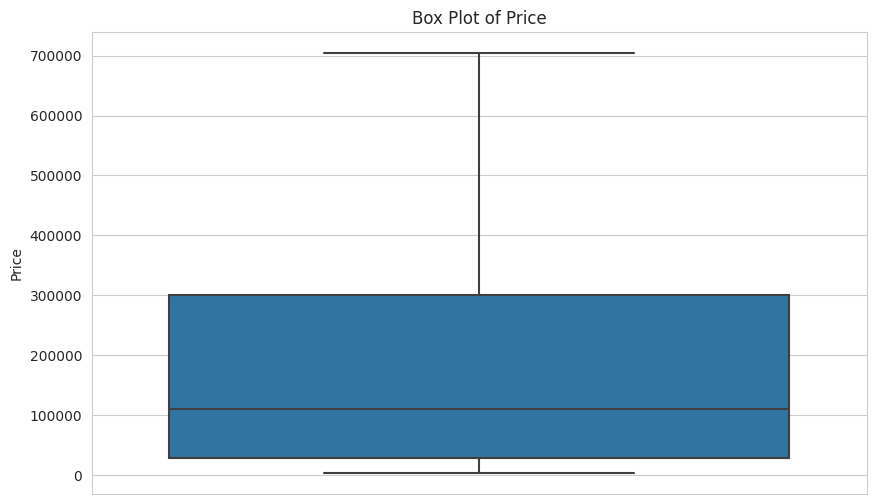

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

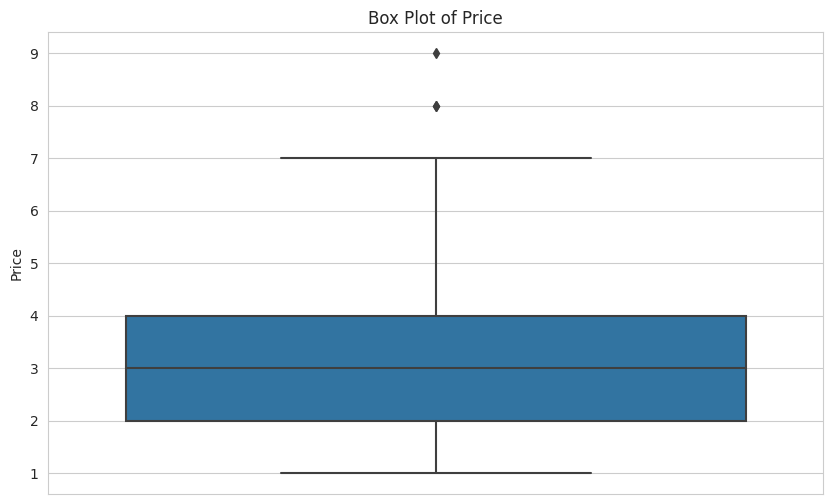

In [25]:
# let's see if removing outliers from price had any effect on bhk
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='bhk')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [26]:
df["bhk"].value_counts()

bhk
3    1907
4    1186
2     753
1     549
5     397
6       7
8       2
7       1
9       1
Name: count, dtype: int64

In [27]:
df.shape

(4803, 8)

In [28]:
df.head()

,location,price,bath,balcony,status,bhk,Type,Size
0,Kalkaji,22000,1.0,1.0,Furnished,1,Apartment,400.0
1,Mansarover Garden,20000,1.0,1.0,Furnished,1,Apartment,400.0
2,Uttam Nagar,8500,1.0,2.0,Semi-Furnished,2,Floor,500.0
3,Model Town,48000,3.0,3.0,Furnished,3,House,1.0
4,Sector 13 Rohini,20000,2.0,2.0,Unfurnished,2,Apartment,810.0


In [29]:
df["status"].value_counts()

status
Unfurnished       2155
Semi-Furnished    1915
Furnished          733
Name: count, dtype: int64

**The Size column has missleading values that are totally incorrect it will be waste to handle this many outliers it will also affect my ml model so i am droping this column and insted of size bhk works just as good**

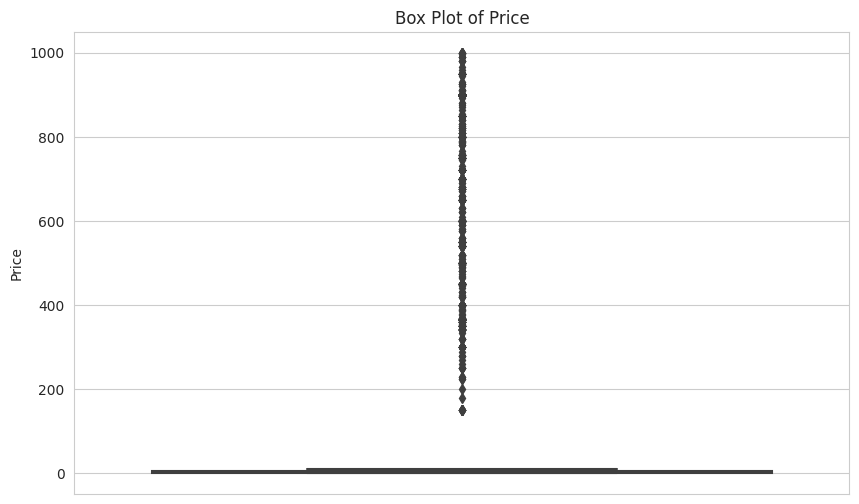

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Size')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [31]:
df.drop(columns=["Size"],inplace=True)

In [32]:
df.head()

,location,price,bath,balcony,status,bhk,Type
0,Kalkaji,22000,1.0,1.0,Furnished,1,Apartment
1,Mansarover Garden,20000,1.0,1.0,Furnished,1,Apartment
2,Uttam Nagar,8500,1.0,2.0,Semi-Furnished,2,Floor
3,Model Town,48000,3.0,3.0,Furnished,3,House
4,Sector 13 Rohini,20000,2.0,2.0,Unfurnished,2,Apartment


In [33]:
df["location"].value_counts()

location
Defence Colony        188
Greater kailash 1     153
Chattarpur            145
Vasant Vihar          139
Safdarjung Enclave    118
                     ... 
Ansari Nagar West       1
Sat Bari                1
Kailash hills           1
Soami Nagar             1
dda flat                1
Name: count, Length: 275, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


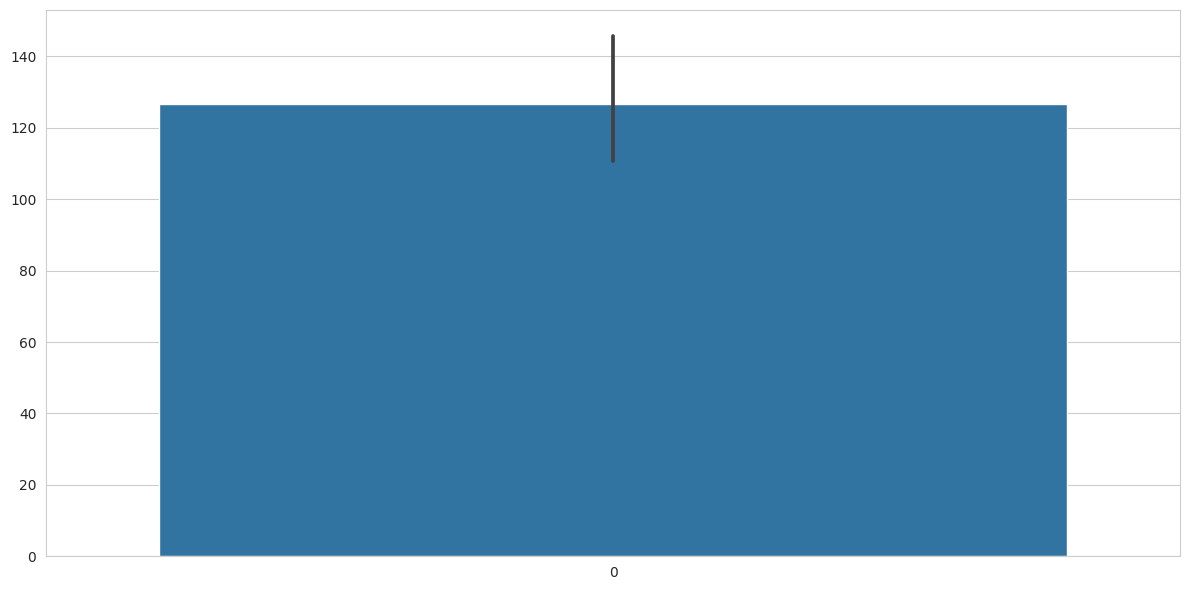

In [34]:
#barplot for location
plt.figure(figsize=(12,6))
sns.barplot(df["location"].value_counts().head(10))
plt.tight_layout()
plt.show()

In [35]:
df.groupby("location").price.describe().reset_index()

,location,count,mean,std,min,25%,50%,75%,max
0,AGCR Enclave,2.0,42000.000000,0.000000,42000.0,42000.0,42000.0,42000.0,42000.0
1,Abul Fazal Enclave Jamia Nagar,3.0,14833.333333,1755.942292,13000.0,14000.0,15000.0,15750.0,16500.0
2,Ajmeri Gate,2.0,21000.000000,4242.640687,18000.0,19500.0,21000.0,22500.0,24000.0
3,Alaknanda,2.0,15500.000000,6363.961031,11000.0,13250.0,15500.0,17750.0,20000.0
4,Amritpuri,3.0,11000.000000,0.000000,11000.0,11000.0,11000.0,11000.0,11000.0
...,...,...,...,...,...,...,...,...,...
270,i p extension patparganj,5.0,20400.000000,3781.534080,18000.0,18000.0,19000.0,20000.0,27000.0
271,laxmi nagar,23.0,18130.434783,3850.080847,6500.0,20000.0,20000.0,20000.0,20000.0
272,masoodpur,2.0,28000.000000,9899.494937,21000.0,24500.0,28000.0,31500.0,35000.0
273,mayur vihar phase 1,9.0,27111.111111,10231.012223,13500.0,20000.0,24000.0,40000.0,40000.0


In [36]:
df.groupby("location").price.mean().sort_values()

location
Sector 34 Rohini         3600.000000
dda flat                 4500.000000
Santnagar                4999.000000
Shakurpur Colony         5000.000000
Burari                   5833.333333
                           ...      
Shanti Niketan         401820.880000
Ghitorni               402639.021739
Sainik Farm            420364.973333
Sat Bari               600000.000000
Vasant Kunj Enclave    700000.000000
Name: price, Length: 275, dtype: float64

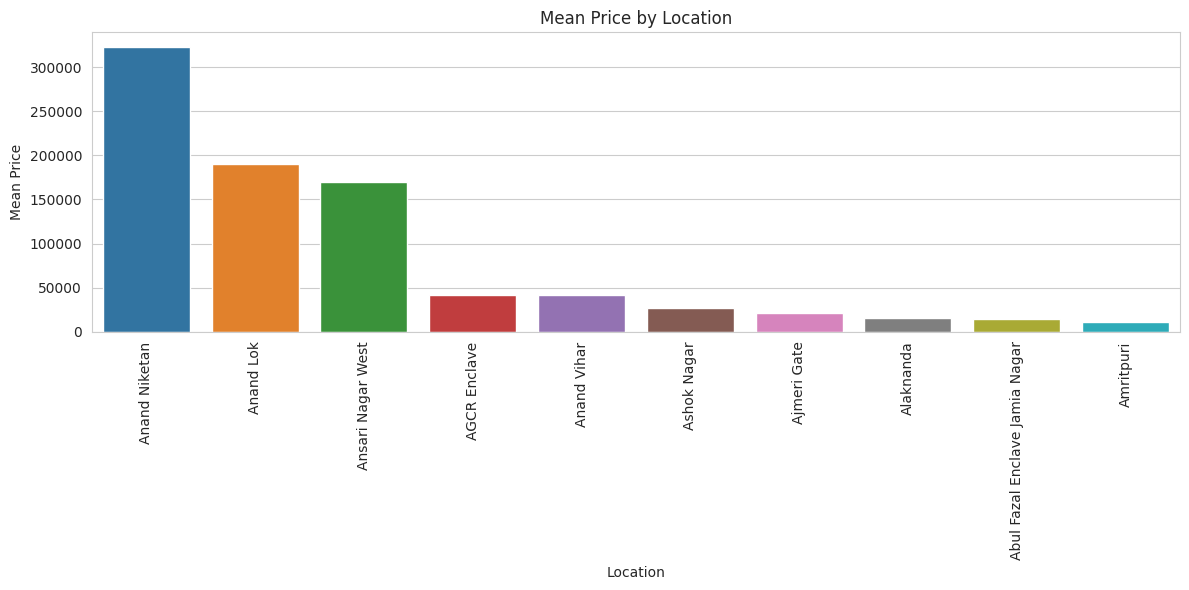

In [37]:
mean_prices = df.groupby('location')['price'].mean().reset_index().head(10)
mean_prices_sorted = mean_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='price', data=mean_prices_sorted)
plt.title('Mean Price by Location')
plt.xlabel('Location')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [38]:
df.head()

,location,price,bath,balcony,status,bhk,Type
0,Kalkaji,22000,1.0,1.0,Furnished,1,Apartment
1,Mansarover Garden,20000,1.0,1.0,Furnished,1,Apartment
2,Uttam Nagar,8500,1.0,2.0,Semi-Furnished,2,Floor
3,Model Town,48000,3.0,3.0,Furnished,3,House
4,Sector 13 Rohini,20000,2.0,2.0,Unfurnished,2,Apartment


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

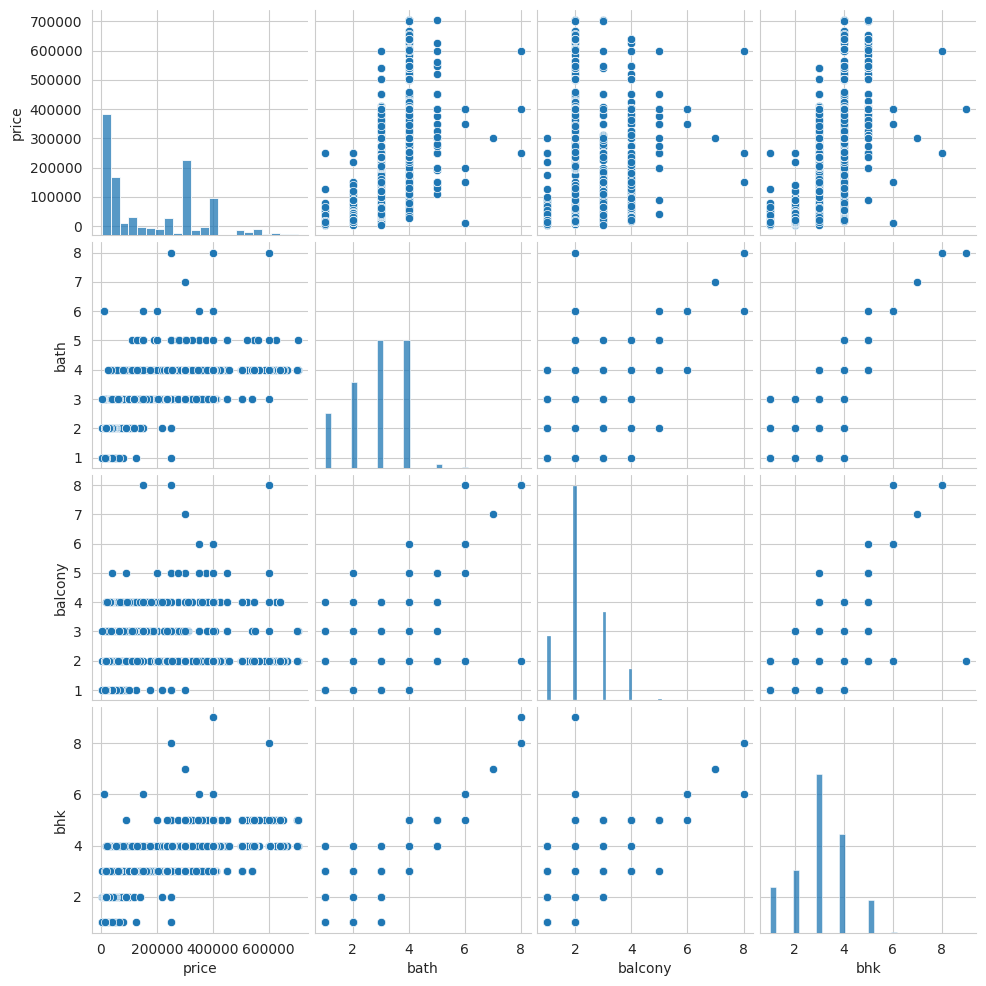

In [39]:
sns.pairplot(df)
plt.show()

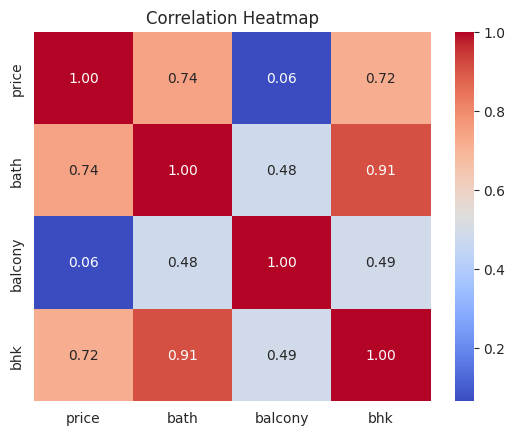

In [40]:
numerical_columns = df.select_dtypes(include=['int64', 'float64','int'])
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


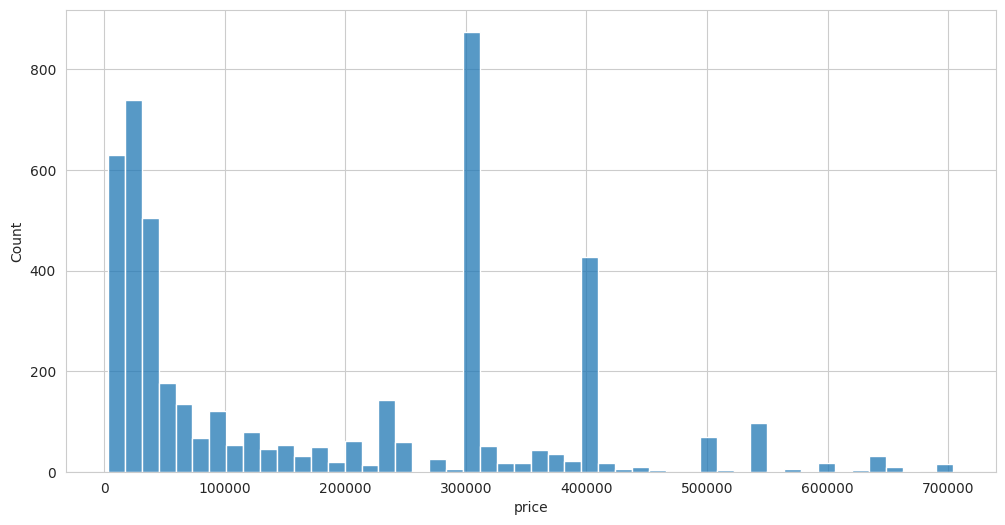

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df["price"],bins=50)
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
numerical_columns = ["price"]
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [43]:
df.head()

,location,price,bath,balcony,status,bhk,Type
0,Kalkaji,0.027088,1.0,1.0,Furnished,1,Apartment
1,Mansarover Garden,0.024237,1.0,1.0,Furnished,1,Apartment
2,Uttam Nagar,0.007841,1.0,2.0,Semi-Furnished,2,Floor
3,Model Town,0.064157,3.0,3.0,Furnished,3,House
4,Sector 13 Rohini,0.024237,2.0,2.0,Unfurnished,2,Apartment


In [44]:
location_freq = df['location'].value_counts(normalize=True).to_dict()
df['location_freq'] = df['location'].map(location_freq)

In [45]:
df.head()

,location,price,bath,balcony,status,bhk,Type,location_freq
0,Kalkaji,0.027088,1.0,1.0,Furnished,1,Apartment,0.005621
1,Mansarover Garden,0.024237,1.0,1.0,Furnished,1,Apartment,0.001874
2,Uttam Nagar,0.007841,1.0,2.0,Semi-Furnished,2,Floor,0.015615
3,Model Town,0.064157,3.0,3.0,Furnished,3,House,0.001874
4,Sector 13 Rohini,0.024237,2.0,2.0,Unfurnished,2,Apartment,0.000833


In [46]:
df.drop(columns=["location"],inplace=True)

In [47]:
df.head()

,price,bath,balcony,status,bhk,Type,location_freq
0,0.027088,1.0,1.0,Furnished,1,Apartment,0.005621
1,0.024237,1.0,1.0,Furnished,1,Apartment,0.001874
2,0.007841,1.0,2.0,Semi-Furnished,2,Floor,0.015615
3,0.064157,3.0,3.0,Furnished,3,House,0.001874
4,0.024237,2.0,2.0,Unfurnished,2,Apartment,0.000833


In [48]:
df["status"].nunique()

3

In [49]:
df['status'] = df['status'].astype('category')
df = pd.get_dummies(df, columns=['status'], prefix='status')

In [50]:
df.head()

,price,bath,balcony,bhk,Type,location_freq,status_Furnished,status_Semi-Furnished,status_Unfurnished
0,0.027088,1.0,1.0,1,Apartment,0.005621,True,False,False
1,0.024237,1.0,1.0,1,Apartment,0.001874,True,False,False
2,0.007841,1.0,2.0,2,Floor,0.015615,False,True,False
3,0.064157,3.0,3.0,3,House,0.001874,True,False,False
4,0.024237,2.0,2.0,2,Apartment,0.000833,False,False,True


In [51]:
df.isna().sum()

price                    0
bath                     0
balcony                  0
bhk                      0
Type                     0
location_freq            0
status_Furnished         0
status_Semi-Furnished    0
status_Unfurnished       0
dtype: int64

In [52]:
df['Type'] = df['Type'].astype('category')
df = pd.get_dummies(df, columns=['Type'], prefix='Type')

In [53]:
df.head()

,price,bath,balcony,bhk,location_freq,status_Furnished,status_Semi-Furnished,status_Unfurnished,Type_Apartment,Type_Floor,Type_House,Type_Villa,Type_penthouse
0,0.027088,1.0,1.0,1,0.005621,True,False,False,True,False,False,False,False
1,0.024237,1.0,1.0,1,0.001874,True,False,False,True,False,False,False,False
2,0.007841,1.0,2.0,2,0.015615,False,True,False,False,True,False,False,False
3,0.064157,3.0,3.0,3,0.001874,True,False,False,False,False,True,False,False
4,0.024237,2.0,2.0,2,0.000833,False,False,True,True,False,False,False,False


# **Model building and Evaluation**

***I am using random Forest Regressor with no hyper parameter tuning as i have tried it and it makes no such difference , so to make it cleaner i didn't used it***

MSE: 0.006417794896526641, R2 Score: 0.8854431295721997


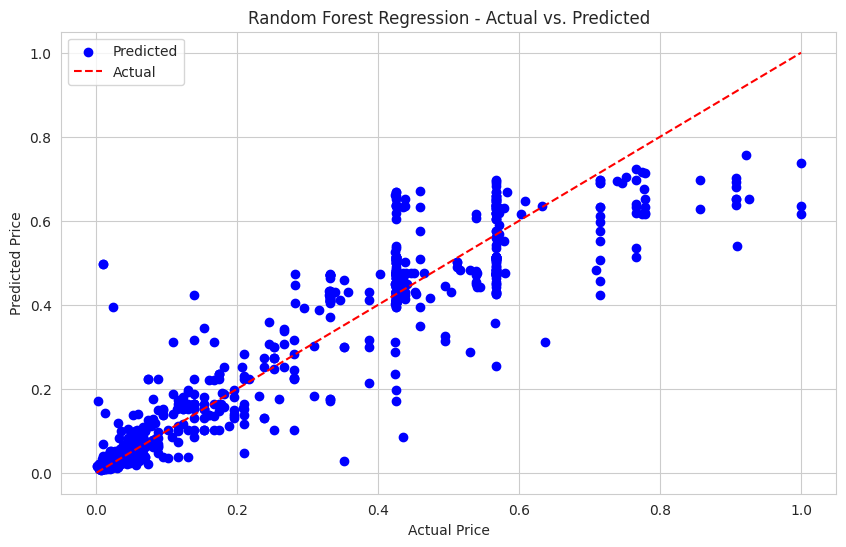

In [54]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title("Random Forest Regression - Actual vs. Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()
